# Question 1
Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
Use external libraries imutils.
Modify the transformation matrix.

In [2]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
from utils import *

In [ ]:
from utils import display_images

# Load the image
img = cv.imread('images/lena.jfif')
rows, cols = img.shape[:2]

center = (cols // 2, rows // 2)

angle = 45
M = cv.getRotationMatrix2D(center, angle, 1.0)

cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])

new_cols = int((rows * sin) + (cols * cos))
new_rows = int((rows * cos) + (cols * sin))

M[0, 2] += (new_cols / 2) - center[0]
M[1, 2] += (new_rows / 2) - center[1]

dst = cv.warpAffine(img, M, (new_cols, new_rows))

display_image("rotate 45 degree", dst) 

In [ ]:
import imutils

# Load the image
img = cv.imread("images\lena.jfif")

# Method 1: Using imutils.rotate_bound
rotated_img_imutils = imutils.rotate_bound(img, -45)

display_image("rotated image", rotated_img_imutils)

# Question 2
Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:

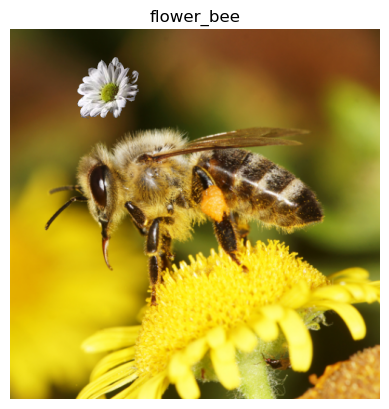

In [12]:
# Read the images
flower = cv.imread("images/flower.jfif", cv.IMREAD_UNCHANGED)
bee = cv.imread("images/native-bee.png", cv.IMREAD_UNCHANGED)

flower_gray = cv.cvtColor(flower, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(flower_gray, 75, 255, cv.THRESH_BINARY)

mask_inv = cv.bitwise_not(mask)

top_left_x = 0 
top_left_y = 0  

flower_height, flower_width = flower.shape[:2]
roi = bee[top_left_y:top_left_y + flower_height, top_left_x:top_left_x + flower_width].copy()

flower_fg = cv.bitwise_and(flower[..., :3], flower[..., :3], mask=mask)
bee_bg = cv.bitwise_and(roi[..., :3], roi[..., :3], mask=mask_inv)

if bee_bg.shape[2] != flower_fg.shape[2]:
    bee_bg = cv.cvtColor(bee_bg, cv.COLOR_BGR2BGRA)

result_roi = cv.add(bee_bg, flower_fg)
result_roi_bgra = cv.cvtColor(result_roi, cv.COLOR_BGR2BGRA)
bee[top_left_y:top_left_y + flower_height, top_left_x:top_left_x + flower_width] = result_roi_bgra

cv.imshow("flower_bee", bee)
cv.waitKey(0)
cv.destroyAllWindows()

# Display output
#display_image("flower_bee", bee)
plt.imshow(cv.cvtColor(bee, cv.COLOR_BGR2RGB))
plt.title("flower_bee")
plt.axis('off')
plt.show()

# Question 3
Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
random_center_crop(image, min_crop_ratio, max_crop_ratio)

In [ ]:
def random_center_crop(image, min_crop_ratio, max_crop_ratio):
    
    if min_crop_ratio < 0.0 or min_crop_ratio > 1.0:
        raise ValueError("min_crop_ratio must be between 0.0 and 1.0")
    elif max_crop_ratio < 0.0 or max_crop_ratio > 1.0:
        raise ValueError("max_crop_ratio must be between 0.0 and 1.0")
    elif min_crop_ratio > max_crop_ratio:
        raise ValueError("min_crop_ratio must not be greater than max_crop_ratio")

    height, width = image.shape[:2]

    min_crop_size = int(min(height, width) * min_crop_ratio)
    max_crop_size = int(min(height, width) * max_crop_ratio)

    # Randomly select crop size
    crop_size = np.random.randint(min_crop_size, max_crop_size + 1)

    # Calculate crop region
    start_x = max(0, (width - crop_size) // 2)
    start_y = max(0, (height - crop_size) // 2)
    end_x = start_x + crop_size
    end_y = start_y + crop_size

    # Perform crop
    cropped_image = image[start_y:end_y, start_x:end_x]

    return cropped_image

img = random_center_crop(cv.imread("images\lena.jfif"), 0.1, 0.5)
display_image("result",img)

# Question 4
Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.

In [13]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    
    # Salt noise
    salt_mask = np.random.random(image.shape[:2]) < salt_prob
    noisy_image[salt_mask] = 255
    
    # Pepper noise
    pepper_mask = np.random.random(image.shape[:2]) < pepper_prob
    noisy_image[pepper_mask] = 0
    return noisy_image

In [14]:
img = cv.imread("images/meal.jpg")
noisy_image = add_salt_and_pepper_noise(img,0.09,0.2)
display_images([img,noisy_image],("Original","Noisy_Image"))